<a href="https://colab.research.google.com/github/Mahdi-Saadati/Basic-Machine-Learning/blob/main/13.b.%20Hierarchical%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

در ادامه، الگوریتم Hierarchical Clustering (خوشه‌بندی سلسله‌مراتبی) را روی دیتاست واقعی Breast Cancer با پایتون پیاده می‌کنیم.

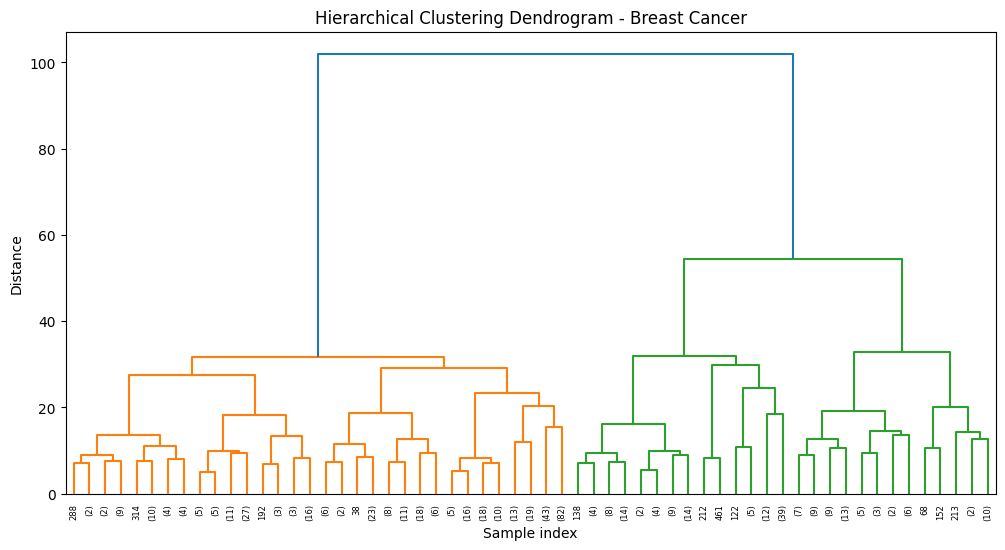

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

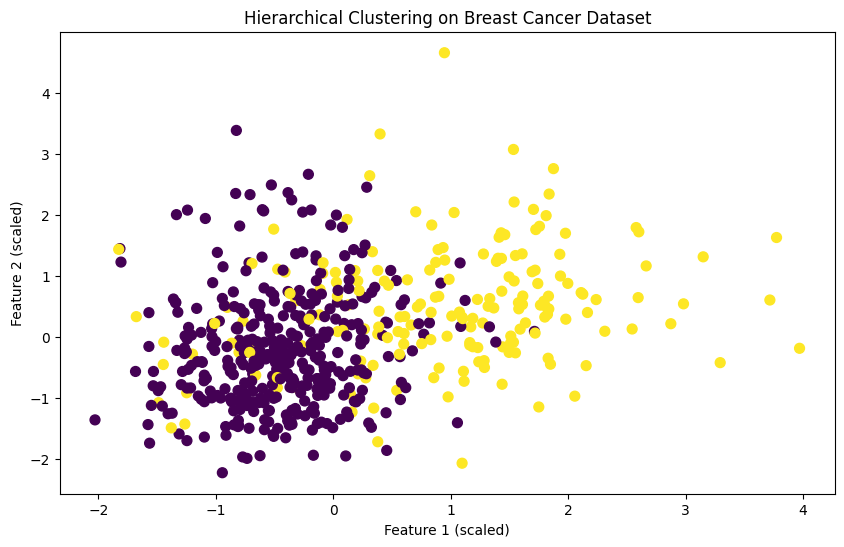

In [3]:
# وارد کردن کتابخانه‌ها
import pandas as pd  # برای کار با دیتافریم‌ها
import matplotlib.pyplot as plt  # برای رسم نمودارها
from sklearn.datasets import load_breast_cancer  # دیتاست سرطان پستان
from sklearn.preprocessing import StandardScaler  # برای نرمال‌سازی داده‌ها
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster  # برای خوشه‌بندی سلسله‌مراتبی

# بارگذاری دیتاست
cancer = load_breast_cancer()  # بارگذاری دیتاست
X = cancer.data  # انتخاب ویژگی‌ها
y_true = cancer.target  # برچسب واقعی برای مقایسه (اختیاری)

# نرمال‌سازی داده‌ها
scaler = StandardScaler()  # ایجاد شیء استانداردساز
X_scaled = scaler.fit_transform(X)  # نرمال‌سازی تمام ویژگی‌ها

# ایجاد ماتریس لینک برای Hierarchical Clustering
Z = linkage(X_scaled, method='ward')  # محاسبه linkage با روش Ward (کمینه کردن واریانس خوشه‌ها)

# رسم Dendrogram (درخت خوشه‌بندی)
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # نمایش درخت تا 5 سطح برای وضوح بهتر
plt.title("Hierarchical Clustering Dendrogram - Breast Cancer")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# تعیین برچسب خوشه‌ها با تعداد خوشه دلخواه
n_clusters = 2  # تعداد خوشه‌ها (مثلاً 2 برای خوشه‌بندی خوش‌خیم/بدخیم)
labels = fcluster(Z, n_clusters, criterion='maxclust')  # تعیین خوشه‌ها بر اساس تعداد خوشه‌ها

# اضافه کردن برچسب‌ها به دیتافریم
df = pd.DataFrame(X_scaled, columns=cancer.feature_names)  # دیتافریم با ویژگی‌ها
df['Cluster'] = labels  # اضافه کردن ستون خوشه‌ها
print(df.head())  # نمایش 5 ردیف اول دیتافریم

# رسم خوشه‌ها روی دو ویژگی اول برای بصری‌سازی
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis', s=50)
plt.xlabel("Feature 1 (scaled)")  # محور x
plt.ylabel("Feature 2 (scaled)")  # محور y
plt.title("Hierarchical Clustering on Breast Cancer Dataset")
plt.show()


<div dir="rtl" align="right">

📌 توضیح خط به خط

StandardScaler → نرمال‌سازی داده‌ها برای اینکه همه ویژگی‌ها یک واحد اندازه‌گیری داشته باشند.

linkage → محاسبه ماتریس فاصله و ارتباط بین نمونه‌ها. روش ward سعی می‌کند واریانس داخل خوشه‌ها کمینه شود.

dendrogram → رسم درخت سلسله‌مراتبی که نشان می‌دهد نمونه‌ها چطور به هم متصل می‌شوند.

fcluster → تعیین برچسب خوشه‌ها از روی درخت با معیار تعداد خوشه دلخواه (maxclust).

رسم نقاط → برای مشاهده خوشه‌ها روی دو بعد اول (Feature 1 و Feature 2).